In [2]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

from sklearn import svm

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'NanumGothicCoding'

from visualize import plot_confusion_matrix

In [3]:
df = pd.read_csv('Data_M_1.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
              
             'gasoline_old',
              'diesel_fuel_type',
             'diesel_old',
              'electric_fuel_type',
             'electric_old',
              'hydrogen_fuel_type',
             'hydrogen_old',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 45)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,diesel_fuel_cost,diesel_price,electric_car_class,electric_infra,electric_fuel_cost,electric_price,hydrogen_car_class,hydrogen_infra,hydrogen_fuel_cost,hydrogen_price
0,3,3,2,31,1,1,10000,3,3,7,...,150,4000,1,50,100,4000,0,100,100,4000
1,3,3,2,31,1,1,10000,3,3,7,...,50,3000,1,50,50,4000,0,100,50,4000
2,3,3,2,31,1,1,10000,3,3,7,...,150,2000,1,100,50,5000,1,100,150,3000
3,3,3,2,31,1,1,10000,3,3,7,...,100,5000,1,100,150,5000,0,50,150,5000
4,3,3,2,31,1,1,10000,3,3,7,...,50,2000,0,100,100,2000,1,100,50,3000


In [4]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',

    'gasoline_infra',
    'gasoline_fuel_cost',
    'gasoline_price',
    'diesel_infra',
    'diesel_fuel_cost',
    'diesel_price',
    'electric_infra',
    'electric_fuel_cost',
    'electric_price',
    'hydrogen_infra',
    'hydrogen_fuel_cost',
    'hydrogen_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
    
    'gasoline_car_class',
    'diesel_car_class',
    'electric_car_class',
    'hydrogen_car_class',
]
TARGET_COLUMNS = [
    'answer',
]

In [5]:
target_names = [
    'gasoline',
    'diesel',
    'electric',
    'hydrogen',
]

In [6]:
#BINARY = False
TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = df[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = df[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

X = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(X.shape, y.shape)

(4128, 113) (4128,)


In [7]:
print(FEATURE_NAMES)

['policy', 'eco', 'tech', 'age', 'owning', 'mileage', 'family', 'wealth', 'gasoline_infra', 'gasoline_fuel_cost', 'gasoline_price', 'diesel_infra', 'diesel_fuel_cost', 'diesel_price', 'electric_infra', 'electric_fuel_cost', 'electric_price', 'hydrogen_infra', 'hydrogen_fuel_cost', 'hydrogen_price', 'gender_1', 'gender_2', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'Car1_fuel_type_1', 'Car1_fuel_type_2', 'Car1_fuel_type_3', 'Car1_fuel_type_5', 'Car1_car_class_1', 'Car1_car_class_2', 'Car1_car_class_3', 'Car1_car_class_4', 'Car1_car_class_5', 'Car1_car_class_6', 'Car1_infra_10', 'Car1_infra_100', 'Car1_fuel_cost_1', 'Car1_fuel_cost_2', 'Car1_fuel_cost_3', 'Car1_fuel_cost_4', 'Car1_price_1', 'Car1_price_2', 'Car1_price_3', 'Car1_price_4', 'Car1_old_1', 'Car1_old_2', 'Car1_old_3', 'Car1_old_4', 'Car2_fuel_type_0', 'Car2_fuel_type_1', 'Car2_fuel_type_2', 'Car2_fuel_type_3', 'Car2_fuel_type_5', 'Car2_car_class_0', 'Car2_car_class_1', 'Car2_car_class_2', 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

In [9]:
df = pd.read_csv('Data_M_1_test.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
              
             'gasoline_old',
              'diesel_fuel_type',
             'diesel_old',
              'electric_fuel_type',
             'electric_old',
              'hydrogen_fuel_type',
             'hydrogen_old',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 45)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,diesel_fuel_cost,diesel_price,electric_car_class,electric_infra,electric_fuel_cost,electric_price,hydrogen_car_class,hydrogen_infra,hydrogen_fuel_cost,hydrogen_price
0,3,3,2,31,1,1,10000,3,3,7,...,100,4000,1,50,50,5000,1,10,50,7000
1,3,3,2,31,1,1,10000,3,3,7,...,100,4000,1,50,50,5000,1,10,50,7000
2,3,3,2,31,1,1,10000,3,3,7,...,100,4000,1,50,50,5000,1,10,50,7000
3,3,3,2,31,1,1,10000,3,3,7,...,100,4000,1,50,50,5000,1,10,50,7000
4,3,3,2,31,1,1,10000,3,3,7,...,100,4000,1,50,50,5000,1,10,50,7000


In [10]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',

    'gasoline_infra',
    'gasoline_fuel_cost',
    'gasoline_price',
    'diesel_infra',
    'diesel_fuel_cost',
    'diesel_price',
    'electric_infra',
    'electric_fuel_cost',
    'electric_price',
    'hydrogen_infra',
    'hydrogen_fuel_cost',
    'hydrogen_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
    
    'gasoline_car_class',
    'diesel_car_class',
    'electric_car_class',
    'hydrogen_car_class',
]
TARGET_COLUMNS = [
    'answer',
]

In [11]:
target_names = [
    'gasoline',
    'diesel',
    'electric',
    'hydrogen',
]

In [12]:
#BINARY = False
TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = df[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = df[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

X = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(X.shape, y.shape)

(4128, 113) (4128,)


In [13]:
print(FEATURE_NAMES)

['policy', 'eco', 'tech', 'age', 'owning', 'mileage', 'family', 'wealth', 'gasoline_infra', 'gasoline_fuel_cost', 'gasoline_price', 'diesel_infra', 'diesel_fuel_cost', 'diesel_price', 'electric_infra', 'electric_fuel_cost', 'electric_price', 'hydrogen_infra', 'hydrogen_fuel_cost', 'hydrogen_price', 'gender_1', 'gender_2', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'Car1_fuel_type_1', 'Car1_fuel_type_2', 'Car1_fuel_type_3', 'Car1_fuel_type_5', 'Car1_car_class_1', 'Car1_car_class_2', 'Car1_car_class_3', 'Car1_car_class_4', 'Car1_car_class_5', 'Car1_car_class_6', 'Car1_infra_10', 'Car1_infra_100', 'Car1_fuel_cost_1', 'Car1_fuel_cost_2', 'Car1_fuel_cost_3', 'Car1_fuel_cost_4', 'Car1_price_1', 'Car1_price_2', 'Car1_price_3', 'Car1_price_4', 'Car1_old_1', 'Car1_old_2', 'Car1_old_3', 'Car1_old_4', 'Car2_fuel_type_0', 'Car2_fuel_type_1', 'Car2_fuel_type_2', 'Car2_fuel_type_3', 'Car2_fuel_type_5', 'Car2_car_class_0', 'Car2_car_class_1', 'Car2_car_class_2', 

In [14]:
X_test=X
y_test=y

In [15]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


              precision    recall  f1-score   support

    gasoline       0.56      0.63      0.59       950
      diesel       0.47      0.51      0.49       660
    electric       0.68      0.63      0.66      1668
    hydrogen       0.58      0.53      0.56       850

    accuracy                           0.59      4128
   macro avg       0.57      0.58      0.57      4128
weighted avg       0.60      0.59      0.59      4128



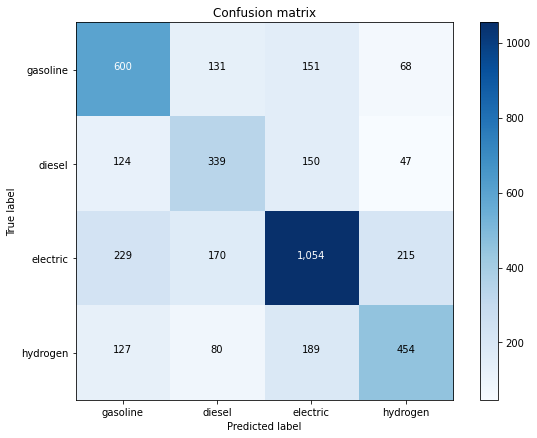

In [16]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

In [35]:
df = pd.DataFrame([y_pred])
with pd.ExcelWriter("filename.xlsx") as writer:
    df.to_excel(writer)